Data Description: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

Domain: Object recognition

Context: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Attribute Information:
●	All the features are geometric features extracted from the silhouette. 
●	All are numeric in nature.

Learning Outcomes: 
●	Exploratory Data Analysis
●	Reduce number dimensions in the dataset with minimal information loss
●	Train a model using Principal Components

Objective: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using raw data.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [106]:
df = pd.read_csv("vehicle.csv")
df.shape , df.columns

((846, 19),
 Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
        'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
        'skewness_about.2', 'hollows_ratio', 'class'],
       dtype='object'))

In [107]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [108]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [109]:
#check for missing values
Temp = pd.DataFrame(df.isnull().sum())
Temp.columns = ['Sum']
print('Number of variables with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])))
Var_with_missingValues=Temp[Temp['Sum']>0].index.tolist()
print('The variables with missing values:', Var_with_missingValues)

Number of variables with missing values: 14
The variables with missing values: ['circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2']


In [110]:
#Total number of rows with missing values.
df.isnull().sum().sum()

41

In [111]:
df.circularity.describe()

count    841.000000
mean      44.828775
std        6.152172
min       33.000000
25%       40.000000
50%       44.000000
75%       49.000000
max       59.000000
Name: circularity, dtype: float64

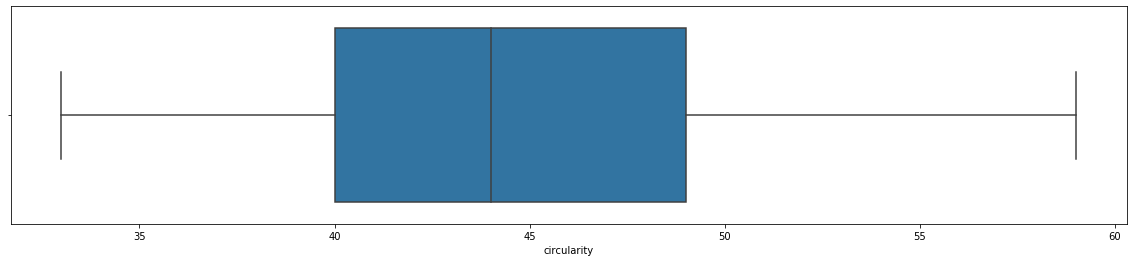

In [112]:
sns.boxplot(df.circularity)
#no outliers and looks like a normal distribution and hence replacing the missing values with mean will be fair estimation

In [113]:
df.circularity.fillna(df.circularity.mean(), inplace=True)

In [114]:
sns.boxplot(df.distance_circularity)
#same observation as above.

In [115]:
#Replacing all missing values with the mean of the respective column
df.fillna(df.mean(), inplace=True)

In [116]:
#Univariate analsis

var=np.arange(1,len(df.columns))
var
from IPython.core.pylabtools import figsize
figsize(20, 15)
for i in var:
    plt.subplot(3,6,i)
    sns.distplot(df.iloc[:,(i-1)])

In [117]:
# All the variables have distributions that are close to normal

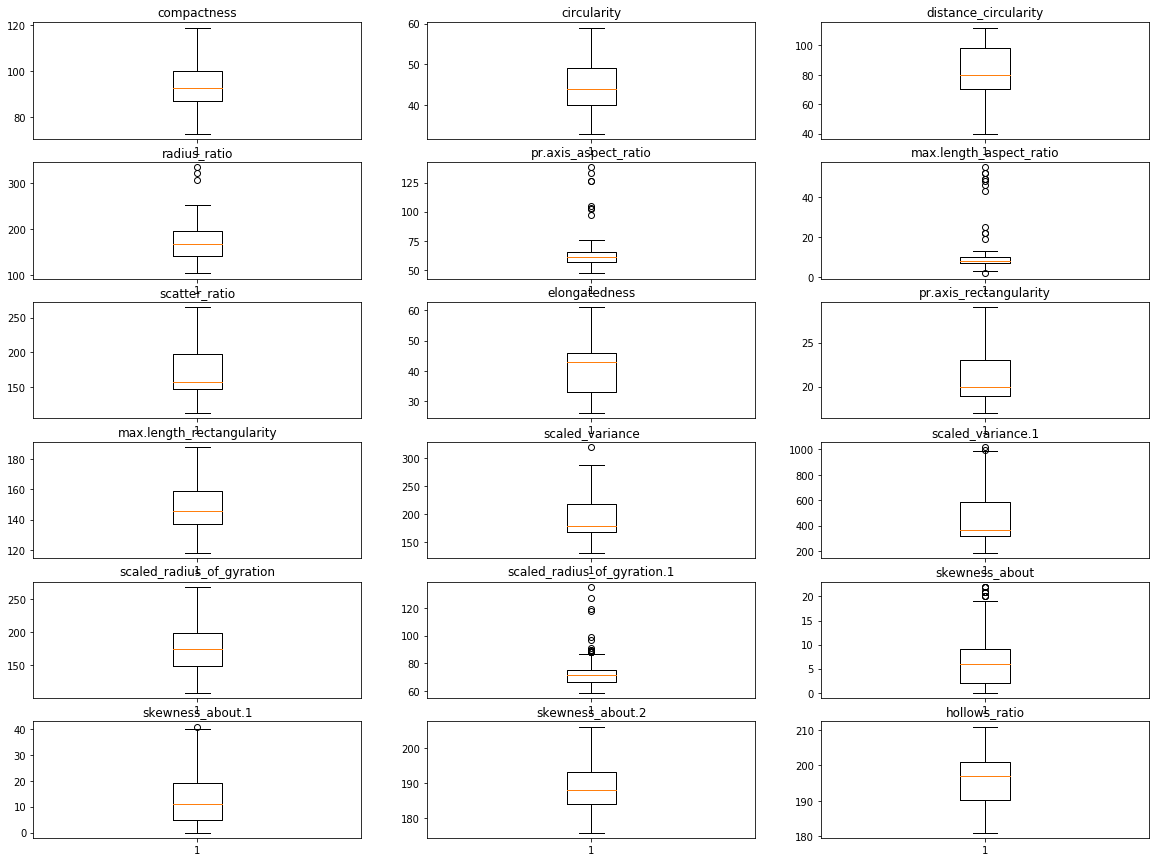

In [118]:
# Check for outliers
figsize(20, 15)
for i in var:
    plt.subplot(6,3,i)
    plt.boxplot(df.iloc[:,(i-1)])
    plt.title(df.columns[i-1])

A few variables a have some outliers. There are various methods of treating outliers. In this case, I am capping the outliers to the maximum possible value that is not an outlier.

In [119]:
Q1=np.percentile(df['radius_ratio'],25)
Q3=np.percentile(df['radius_ratio'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
df.radius_ratio=np.where(df.radius_ratio>UL, UL, df.radius_ratio)

In [120]:
Q1=np.percentile(df['pr.axis_aspect_ratio'],25)
Q3=np.percentile(df['pr.axis_aspect_ratio'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
df['pr.axis_aspect_ratio']=np.where(df['pr.axis_aspect_ratio']>UL, UL, df['pr.axis_aspect_ratio'])

In [121]:
Q1=np.percentile(df['pr.axis_aspect_ratio'],25)
Q3=np.percentile(df['pr.axis_aspect_ratio'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
df['pr.axis_aspect_ratio']=np.where(df['pr.axis_aspect_ratio']>UL, UL, df['pr.axis_aspect_ratio'])

In [122]:
Q1=np.percentile(df['max.length_aspect_ratio'],25)
Q3=np.percentile(df['max.length_aspect_ratio'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
df['max.length_aspect_ratio']=np.where(df['max.length_aspect_ratio']>UL, UL, df['max.length_aspect_ratio'])

In [123]:
Q1=np.percentile(df['scaled_variance'],25)
Q3=np.percentile(df['scaled_variance'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
df['scaled_variance']=np.where(df['scaled_variance']>UL, UL, df['scaled_variance'])

In [124]:
Q1=np.percentile(df['scaled_variance.1'],25)
Q3=np.percentile(df['scaled_variance.1'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
df['scaled_variance.1']=np.where(df['scaled_variance.1']>UL, UL, df['scaled_variance.1'])

In [125]:
Q1=np.percentile(df['scaled_radius_of_gyration.1'],25)
Q3=np.percentile(df['scaled_radius_of_gyration.1'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
df['scaled_radius_of_gyration.1']=np.where(df['scaled_radius_of_gyration.1']>UL, UL, df['scaled_radius_of_gyration.1'])

In [126]:
Q1=np.percentile(df['skewness_about'],25)
Q3=np.percentile(df['skewness_about'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
df['skewness_about']=np.where(df['skewness_about']>UL, UL, df['skewness_about'])

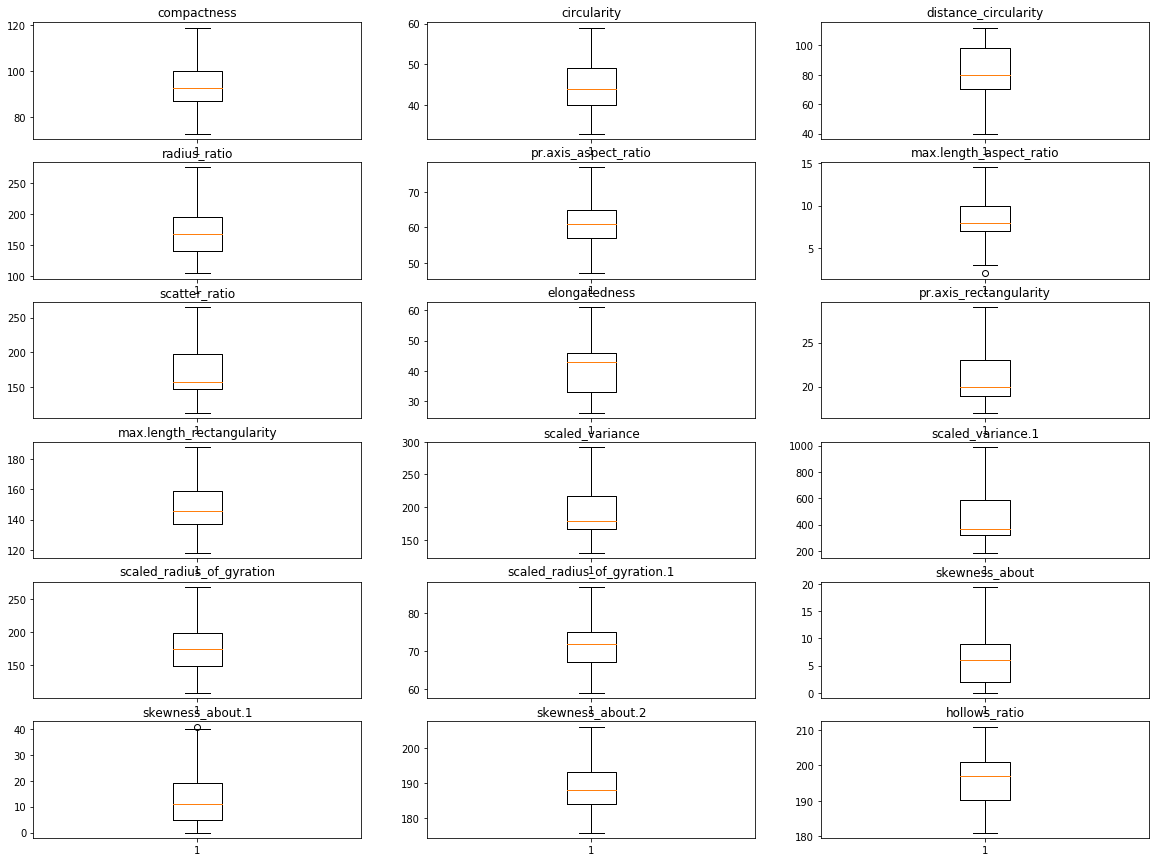

In [127]:
#Check if there are any more outliers
for i in var:
    plt.subplot(6,3,i)
    plt.boxplot(df.iloc[:,(i-1)])
    plt.title(df.columns[i-1])
    
#Two outliers still found, but they are very close to the max allowabe value and hence can be left as is

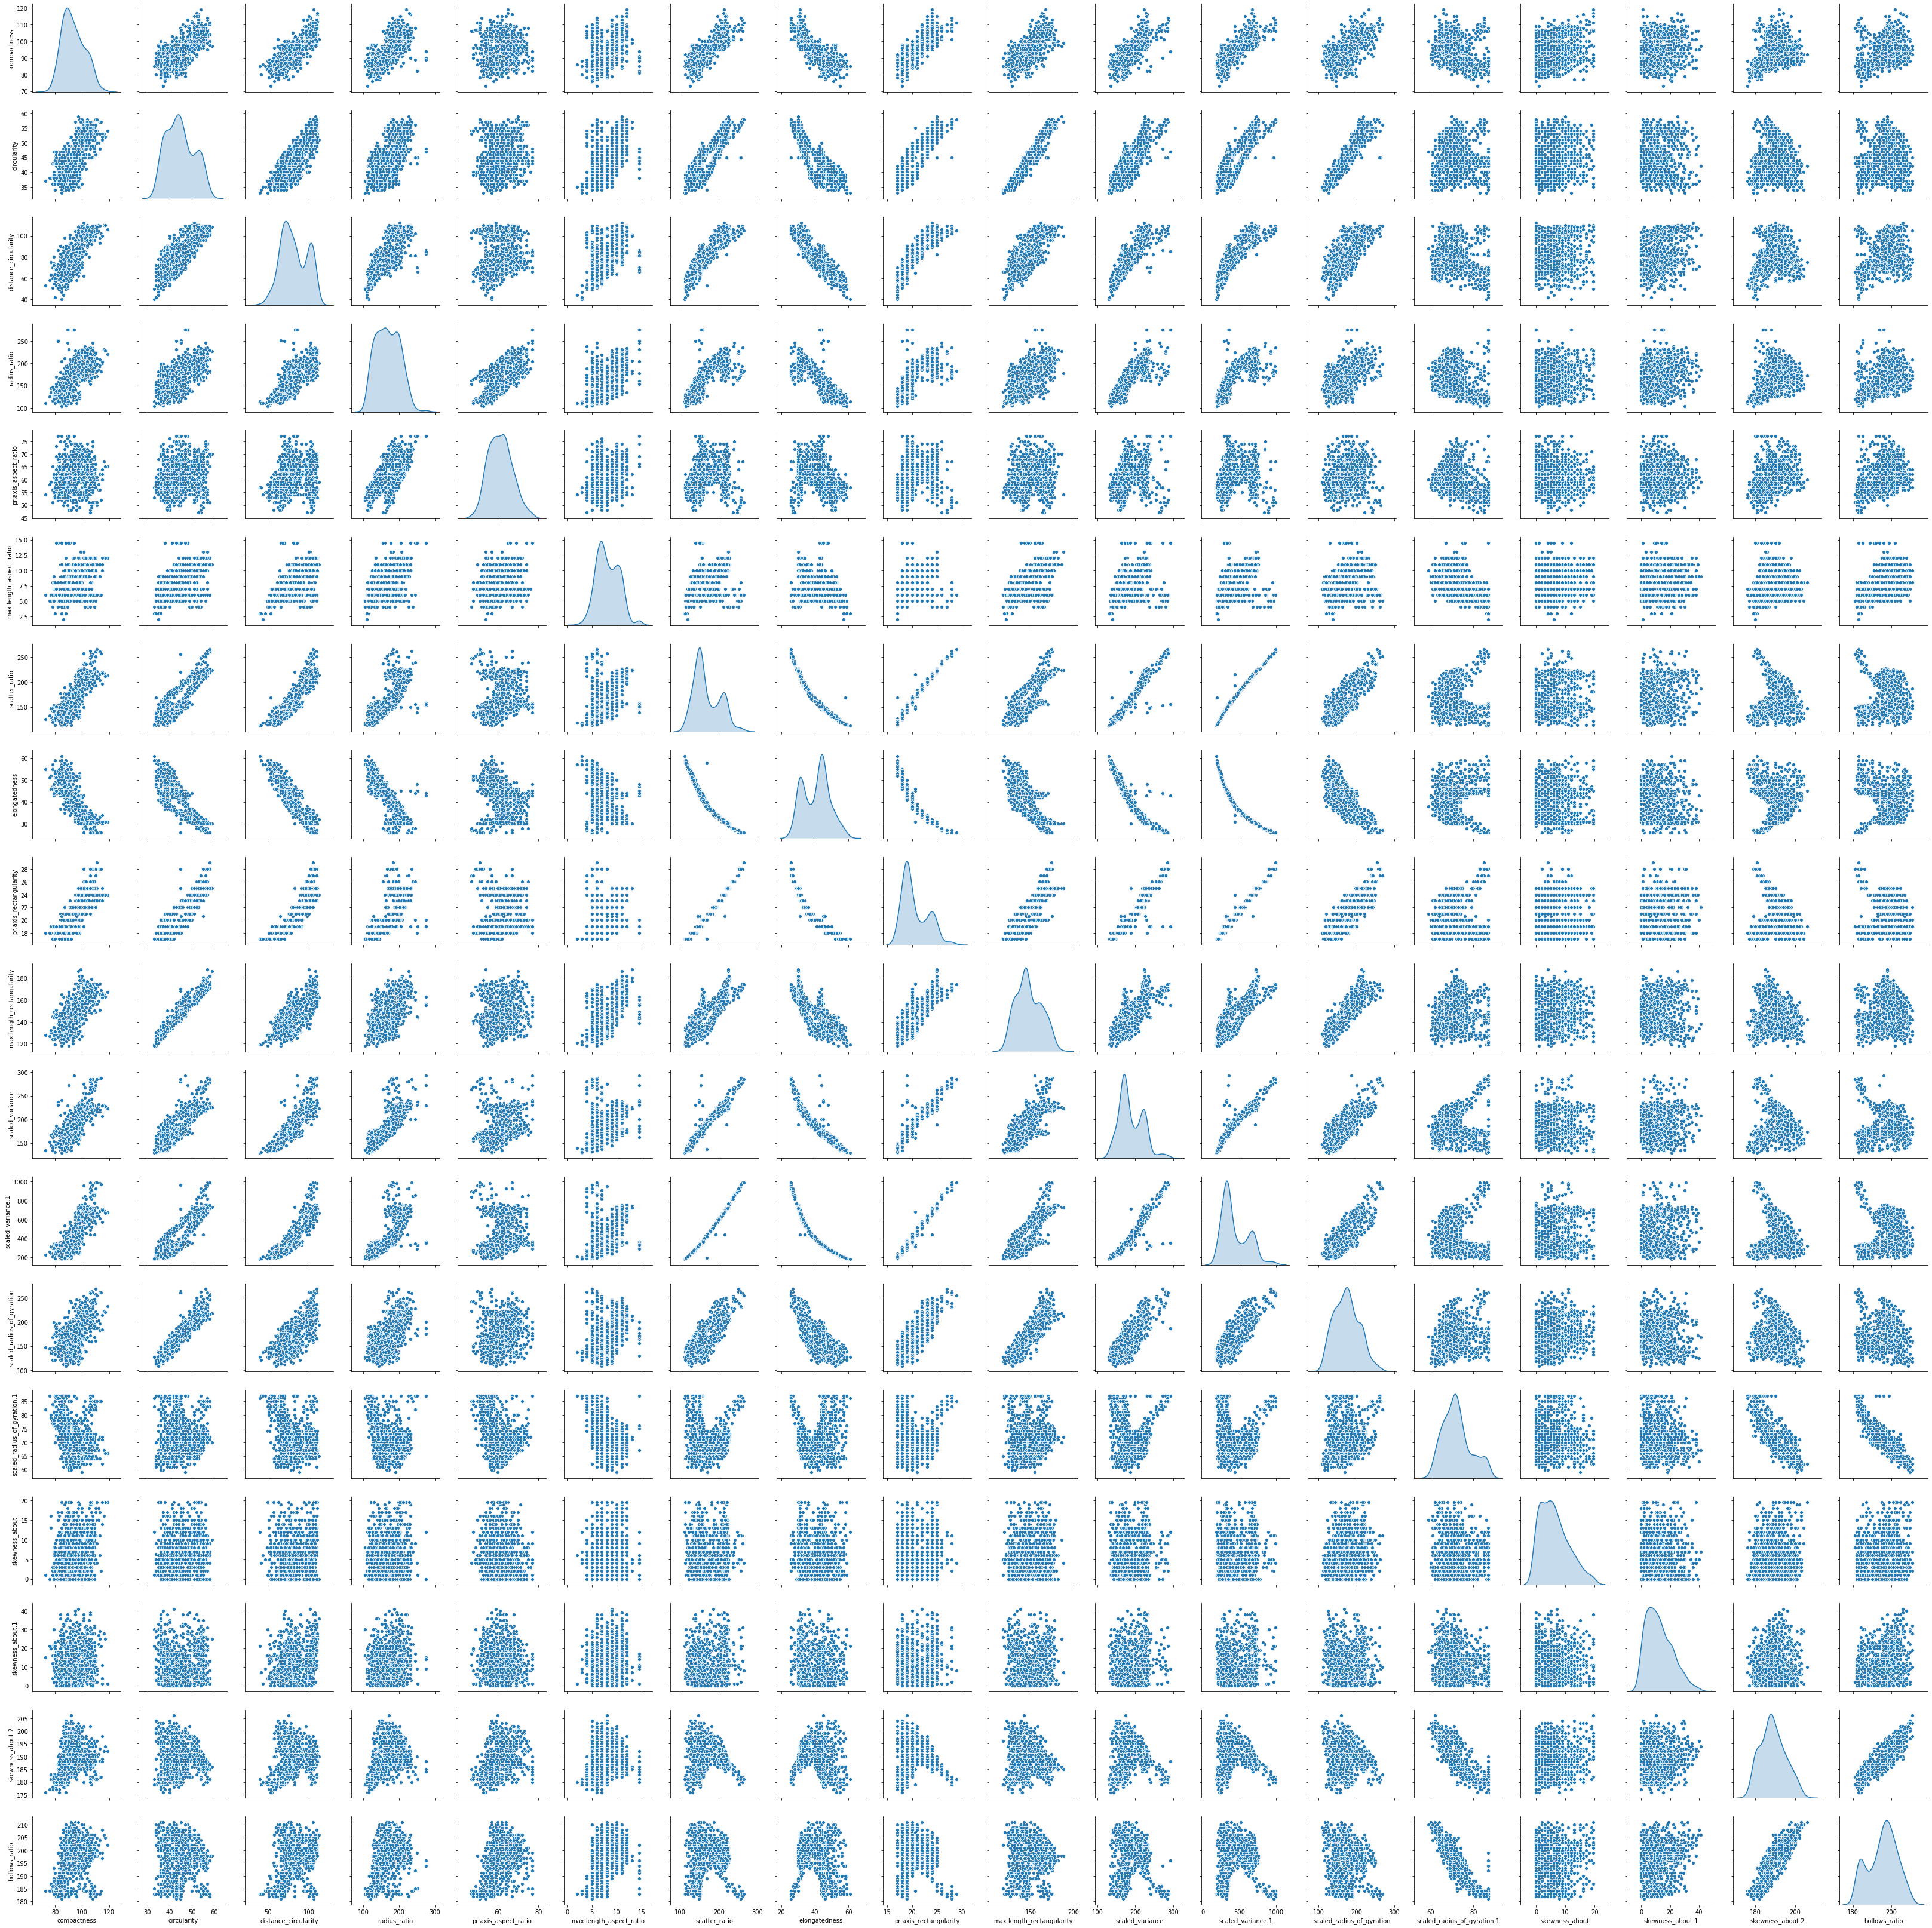

In [128]:
sns.pairplot(df.iloc[:,0:19], diag_kind='kde')

In [129]:
corr=df.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr[(corr >= 0.75) | (corr <= -0.75)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8})

Seems like there are many variables with very high correlation. Presence of all these variables will impact the performance of any model tried due to multicollinearity. The multicollinearity will introduce biasness in the model as well.
However removing so many variables also would not be a great idea as it could lead to loss of information

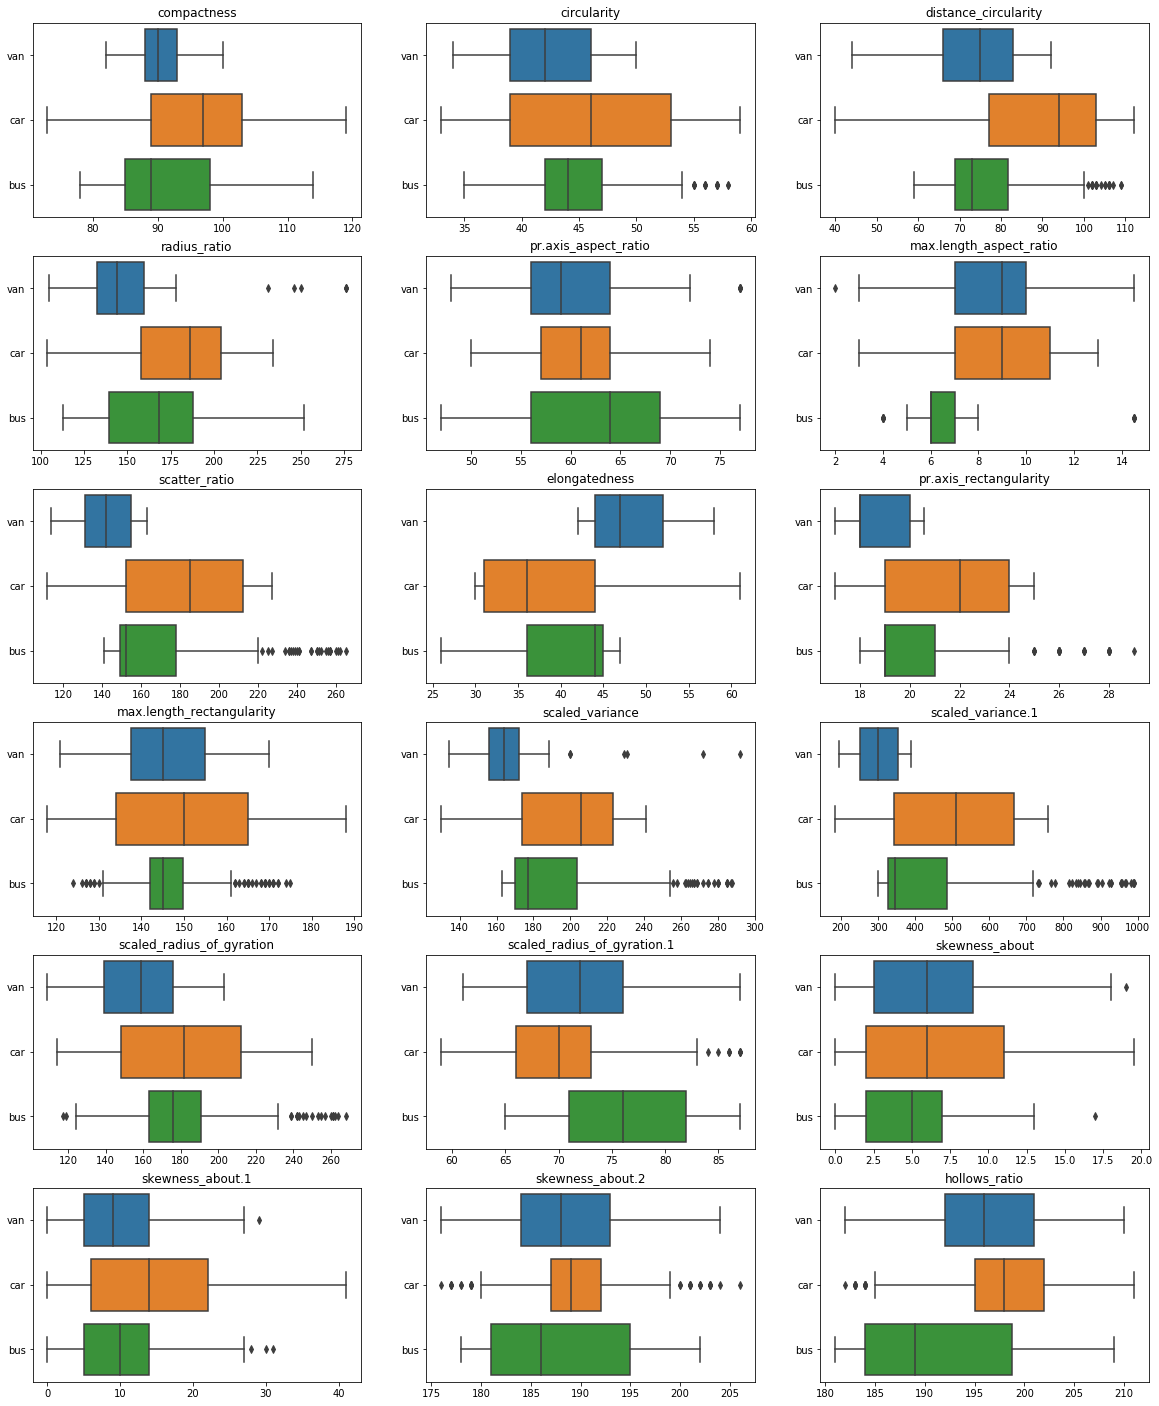

In [130]:
var=np.arange(1,len(df.columns))
from IPython.core.pylabtools import figsize
figsize(20, 25)
for i in var:
    plt.subplot(6,3,i)
    sns.boxplot(df.iloc[:,(i-1)], df['class'])
    plt.ylabel('')
    plt.xlabel('')
    plt.title(df.columns[i-1])

#Visible differentiation noticed with the median values of the vehicle type for all the individual independent variables

In [131]:
df['class']=df['class'].astype('category')


#TRANSFORM THE TARGET VARIABLE TO NUMERIC FOR MODEL BUILDING

In [132]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['class']=LE.fit_transform(df['class'])

In [133]:
df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

Preparation for model building. Separate the dependent and independent variables follwed with splitting into train and test sets

In [134]:
X=df.drop('class', axis=1)
Y=df['class'].values

In [135]:
df['class'].value_counts(normalize=True)

1    0.507092
0    0.257683
2    0.235225
Name: class, dtype: float64

The feature space was seen to have a lot of correlated variables. To avoid multicollinearity we need to either remove the correlated variables (keep one) or introduce principal component analysis which can do two things:
    1. Remove multicollinearity by transforming the variables to another feature space where they are orthogonal
    2. Help with reduction of dimensions as not all variables will be required to explain the variance in the original data

In [136]:
# Scaling of data is required before employing PCA. Data normalized as can be seen below
from sklearn.preprocessing import scale
X_scaled=X.iloc[:,0:19].apply(zscore)
X_scaled.shape, np.any(np.isnan(X_scaled)), np.any(np.isfinite(X_scaled))

((846, 18), False, True)

PCA model built below with 10 components before finding the optimal number of eigen vectors (principal components). Can start with 18 components but starting with 10 for better visualization. If less than 10 components do not explain most the variation, we can restart with more than 10 or 18 components in the PCA model.

In [137]:
Prin_comp=PCA(n_components=10)
Prin_comp.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [138]:
#Eigen Values
Prin_comp.explained_variance_ , 

(array([9.69208387, 3.30479551, 1.19716529, 1.16940299, 0.87443353,
        0.74294509, 0.34413215, 0.22079911, 0.13427582, 0.09630105]),)

In [139]:
#Eiven Vectors
#Prin_comp.components_

Text(0.5, 1.0, 'Cumulative Variance explained')

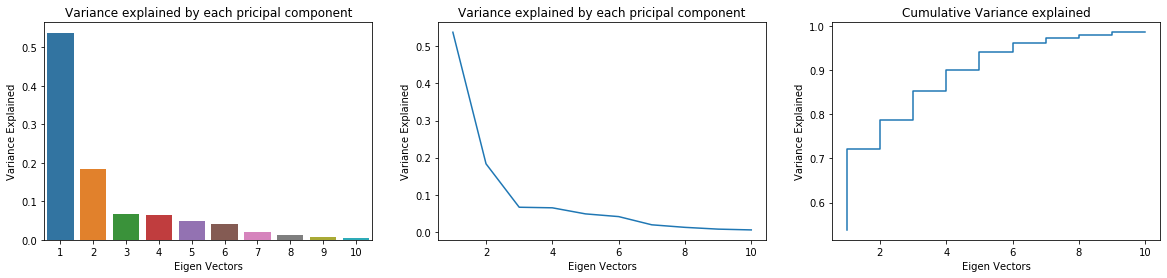

In [140]:
figsize(20,4)

components=np.arange(1,11)
plt.subplot(1,3,1)
sns.barplot(components, Prin_comp.explained_variance_ratio_)
plt.xlabel('Eigen Vectors')
plt.ylabel('Variance Explained')
plt.title('Variance explained by each pricipal component')


plt.subplot(1,3,2)
sns.lineplot(components, (Prin_comp.explained_variance_ratio_))
plt.xlabel('Eigen Vectors')
plt.ylabel('Variance Explained')
plt.title('Variance explained by each pricipal component')

plt.subplot(1,3,3)
plt.step(components, np.cumsum(Prin_comp.explained_variance_ratio_))
plt.xlabel('Eigen Vectors')
plt.ylabel('Variance Explained')
plt.title('Cumulative Variance explained')

In [141]:
#Elbow visible at 5 (or 6). Optimal components can be debated to be 3 as well with 85% variance explained
pd.DataFrame({'Eigen Values':components, 'Variance Explained': Prin_comp.explained_variance_ratio_,
              'Cum_Var': np.cumsum(Prin_comp.explained_variance_ratio_)})

Eigen Values  Variance Explained   Cum_Var
0             1            0.537813  0.537813
1             2            0.183383  0.721195
2             3            0.066431  0.787626
3             4            0.064890  0.852516
4             5            0.048522  0.901038
5             6            0.041226  0.942264
6             7            0.019096  0.961360
7             8            0.012252  0.973612
8             9            0.007451  0.981063
9            10            0.005344  0.986407

In [142]:
Prin_comp_final=PCA(n_components=3)
Prin_comp_final.fit(X_scaled)
X_reduced=Prin_comp_final.transform(X_scaled)

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced,Y,test_size = 0.30, random_state = 101) 

In [159]:
# Set the parameters by cross-validation
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250 ,1500]},
              {'kernel': ['poly'], 'degree': [2,3],'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250 ,1500]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250,1500]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

In [162]:
import time

# starting time
start = time.time()

grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 16.776360273361206


In [163]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 1500, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1500, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [154]:
# Given best kernel is rbf with gamma = 0.01 and C=1000, we may tune further with values closer to these values
param_grid = [{'kernel': ['rbf'], 'gamma': [0.005, 0.008, 0.01, 0.02, 0.03],
                     'C': [500,750 ,1000,1250 ,1500, 1700, 1900]}]

grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

# print best parameter after tuning 
print(grid.best_params_)

{'C': 750, 'gamma': 0.02, 'kernel': 'rbf'}


In [155]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67        67
           1       0.77      0.79      0.78       129
           2       0.54      0.47      0.50        58

    accuracy                           0.69       254
   macro avg       0.65      0.65      0.65       254
weighted avg       0.68      0.69      0.69       254



precision, recall and f1 score across the three levels look average and hence we may have to try the model again with 5 principal components instead of 3. Check the confusion matrix below for further confirmation

In [156]:
confusion_matrix(grid_predictions, y_test)

array([[ 46,  12,  13],
       [ 13, 102,  18],
       [  8,  15,  27]], dtype=int64)

In [157]:
accuracy_score(grid_predictions, y_test)

0.6889763779527559

In [158]:
from sklearn.metrics import f1_score
print(f1_score(y_test, grid_predictions, average='macro'))
print(f1_score(y_test, grid_predictions, average='micro'))
print(f1_score(y_test, grid_predictions, average='weighted'))

0.6484308736217134
0.6889763779527559
0.6854701368435816


In [164]:
#Try with 5 components
Prin_comp_final=PCA(n_components=5)
Prin_comp_final.fit(X_scaled)
X_reduced=Prin_comp_final.transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_reduced,Y,test_size = 0.30, random_state = 101)
# Set the parameters by cross-validation
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250 ,1500]},
              {'kernel': ['poly'], 'degree': [2,3],'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250 ,1500]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250,1500]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]


# starting time
start = time.time()

grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Runtime of the program is 12.150016784667969
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [50]:
# Given best kernel is rbf with gamma = 0.01 and C=1000, we may tune further with values closer to these values
param_grid = [{'kernel': ['rbf'], 'gamma': [0.005, 0.008, 0.01, 0.02, 0.03],
                     'C': [500,750 ,1000,1250 ,1500]}]

grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

# print best parameter after tuning 
print(grid.best_params_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [51]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.95      0.88      0.92       129
           2       0.78      0.90      0.83        58

    accuracy                           0.91       254
   macro avg       0.89      0.91      0.90       254
weighted avg       0.91      0.91      0.91       254



Precision, recall and f1 score across the three levels look fairly good and hence we can feel confident about our model in predcting vehicle type. Check the confusion matrix below for further confirmation

In [52]:
confusion_matrix(grid_predictions, y_test)

array([[ 64,   2,   1],
       [  1, 114,   5],
       [  2,  13,  52]], dtype=int64)

In [53]:
accuracy_score(grid_predictions, y_test)

0.905511811023622

In [54]:
from sklearn.metrics import f1_score
print(f1_score(y_test, grid_predictions, average='macro'))
print(f1_score(y_test, grid_predictions, average='micro'))
print(f1_score(y_test, grid_predictions, average='weighted'))

0.9009621770664747
0.905511811023622
0.9069940233374443


In [87]:
#Try the SVM model without taking help from PCA which had it's advantages as explained above

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1, test_size=0.25)

In [166]:
# Set the parameters by cross-validation
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250 ,1500]},
              {'kernel': ['poly'], 'degree': [2,3],'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250 ,1500]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250,1500]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]



# starting time
start = time.time()

grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 110.09174871444702


In [167]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [72]:
#Given that the best hyperparameters are found, the classifier can be rewritten as below

clf=SVC(kernel='rbf', C=50, gamma=0.0001)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
Accuracy=accuracy_score(y_test, y_pred)
print("Accuracy_original data: %.2f" %Accuracy)

Accuracy_original data: 0.98


In [73]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 51,   0,   1],
       [  0, 107,   0],
       [  1,   2,  50]], dtype=int64)

In [75]:
print(f1_score(y_test, y_pred , average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9776828110161443
0.9811320754716981
0.9809943288716872


The accuracy and f1 scores are much better when the model is run with the original data without any dimensionality reduction. However there are a few things to notice.
1. The time taken to train the model is higher (almost 10 times more) when all the variables are considered for the classification model. If the number of observations are in the order of 10^4 or more, the execution time can be massively different
2. The accuracy score is too good and it does give the feeling that there is possibility of overfitting.
3. The classifier built with reduced dimensions had 5 components and it captured 94% of total variations in the original data. We can try with more components like 8 which captures 98% of total variation and compare it's performance with other models built

In [168]:
#Try with 8 components
Prin_comp_final=PCA(n_components=8)
Prin_comp_final.fit(X_scaled)
X_reduced=Prin_comp_final.transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_reduced,Y,test_size = 0.30, random_state = 101)
# Set the parameters by cross-validation
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250 ,1500]},
              {'kernel': ['poly'], 'degree': [2,3],'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250 ,1500]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250,1500]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

# starting time
start = time.time()

grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Runtime of the program is 10.724856853485107
{'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [83]:
# Given best kernel is rbf with gamma = 0.01 and C=25, we may tune further with values closer to these values
param_grid = [{'kernel': ['rbf'], 'gamma': [0.004,0.005, 0.006,0.008, 0.01, 0.02, 0.03, 0.05, 0.07, 0.09]
                     }]

grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

# print best parameter after tuning 
print(grid.best_params_)

{'gamma': 0.07, 'kernel': 'rbf'}


In [84]:
# With the best hyper parameters found as given above, the final model can be built as given below

clf=SVC(kernel='rbf', C=25, gamma=0.07)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
Accuracy=accuracy_score(y_test, y_pred)
print("Accuracy_original data: %.2f" %Accuracy)

Accuracy_original data: 0.94


In [85]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 64,   2,   1],
       [  2, 121,   6],
       [  0,   5,  53]], dtype=int64)

In [86]:
print(f1_score(y_test, y_pred , average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9341151136761644
0.9370078740157481
0.9372193505645497


In [176]:
Comparison = pd.DataFrame({'Models':['SVM_PCA_with_3_components','SVM_PCA_with_5_components', 'SVM_PCA_with_8_components', 'SVM_without_PCA'],
                            'Accuracy':[0.69, 0.91, 0.94, 0.98],
                          'Runtime':[16.77,12.15,10.72,110.10]})
Comparison
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.barplot(x=Comparison.Models, y=Comparison.Accuracy)
plt.xticks(rotation=90)
plt.xlabel("")
plt.title("Comparison of Model Performance")

plt.subplot(1,2,2)
sns.barplot(x=Comparison.Models, y=Comparison.Runtime)
plt.xticks(rotation=90)
plt.xlabel("")
plt.title("Comparison of Execution Time")

Text(0.5, 1.0, 'Comparison of Execution Time')

In [170]:
Comparison

Models  Accuracy  Runtime
0  SVM_PCA_with_3_components      0.69    16.77
1  SVM_PCA_with_5_components      0.91    12.15
2  SVM_PCA_with_8_components      0.94    10.72
3            SVM_without_PCA      0.98   110.10